# Jawaban 1

# Zipping File

In [ ]:
zip_path = '/content/drive/My\ Drive/BCML/DL/DLCV/cats-dogs.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

!rm /content/cats-dogs.zip

# Libraries & Plot Epoch

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

# Modeling

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)            

Preprocessing dengan width_shift_range=0.1 dan height_shift_range=0.1

In [ ]:
dataset_dir = '/content/'

train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [ ]:
history_base_model = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=75)

Epoch 1/75
100/100 [==============================] - 134s 1s/step - loss: 0.7646 - accuracy: 0.6516 - val_loss: 0.5356 - val_accuracy: 0.7140
Epoch 2/75
100/100 [==============================] - 136s 1s/step - loss: 0.5461 - accuracy: 0.7243 - val_loss: 0.4874 - val_accuracy: 0.7660
Epoch 3/75
100/100 [==============================] - 135s 1s/step - loss: 0.5083 - accuracy: 0.7575 - val_loss: 0.4817 - val_accuracy: 0.7540
Epoch 4/75
100/100 [==============================] - 136s 1s/step - loss: 0.4912 - accuracy: 0.7596 - val_loss: 0.4392 - val_accuracy: 0.7904
Epoch 5/75
100/100 [==============================] - 135s 1s/step - loss: 0.4782 - accuracy: 0.7741 - val_loss: 0.4452 - val_accuracy: 0.7846
Epoch 6/75
100/100 [==============================] - 136s 1s/step - loss: 0.4693 - accuracy: 0.7786 - val_loss: 0.4726 - val_accuracy: 0.7713
Epoch 7/75
100/100 [==============================] - 136s 1s/step - loss: 0.4627 - accuracy: 0.7807 - val_loss: 0.4253 - val_accuracy: 0.8002

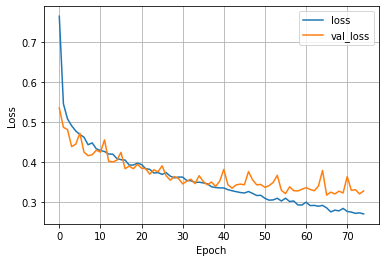

In [ ]:
plot_loss(history_base_model)

Didapat pada epoch ke 66 akurasi tertinggi dan validation loss terendah. Dimana:

Epoch 66/75
100/100 [==============================] - 135s 1s/step - loss: 0.2862 - accuracy: 0.8759 - val_loss: 0.3180 - val_accuracy: 0.8641

# Jawaban 2

# Modeling

Dengan 4 layer convo(32,64,128,128 filter) dan 4 max pooling. FC layer dengan 2 hidden layer(128 neuron)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 128)       1

Preprocessing dengan width_shift_range=0.1 dan height_shift_range=0.1

In [ ]:
dataset_dir = '/content/'

train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [ ]:
history_base_model = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=75)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/75
100/100 [==============================] - 132s 1s/step - loss: 0.6815 - accuracy: 0.5684 - val_loss: 0.6379 - val_accuracy: 0.6408
Epoch 2/75
100/100 [==============================] - 133s 1s/step - loss: 0.6581 - accuracy: 0.6044 - val_loss: 0.6239 - val_accuracy: 0.6599
Epoch 3/75
100/100 [==============================] - 134s 1s/step - loss: 0.6325 - accuracy: 0.6430 - val_loss: 0.5919 - val_accuracy: 0.6790
Epoch 4/75
100/100 [==============================] - 135s 1s/step - loss: 0.6184 - accuracy: 0.6510 - val_loss: 0.5872 - val_accuracy: 0.6874
Epoch 5/75
100/100 [==============================] - 134s 1s/step - loss: 0.6018 - accuracy: 0.6724 - val_loss: 0.6208 - val_accuracy: 0.6359
Epoch 6/75
100/100 [==============================] - 134s 1s/step - loss: 0.5873 - accuracy: 0.6855 - val_loss: 0.5445 - val_accuracy: 0.7207
Epoch 7/75
100/100 [==============================] - 135s 1s/step

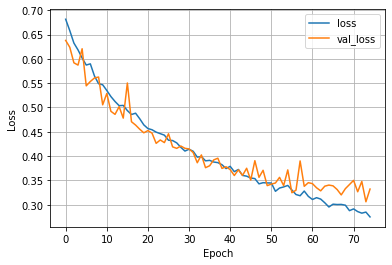

In [ ]:
plot_loss(history_base_model)

Didapat pada epoch ke 74 akurasi tertinggi dan validation loss terendah, dimana:

Epoch 74/75
100/100 [==============================] - 153s 2s/step - loss: 0.2846 - accuracy: 0.8791 - val_loss: 0.3059 - val_accuracy: 0.8703

# Kesimpulan

Penambahan 1 layer convo(128 filtering) dan max pooling, serta 1 layer hidden dengan 128 neuron lebih meningkatkan akurasi dan mengurangi akurasi loss pada model